# Fractional Calculus

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
import math

### Gamma Function

$$
\Gamma(z) := \int_0^\infty t^{z-1}e^{-t}dt
$$

#### Proposition
For any integer $n$, $\Gamma(n) = (n-1)!$

#### Proof
Induction. $\Gamma(1) = 1$.

\begin{eqnarray}
\Gamma(n) &=& \int_0^\infty t^{n-1}e^{-t}dt\\
&=& - \int_0^\infty t^{n-1}de^{-t}\\ 
&=&-e^{-t}t^{n-1}\bigg|_{0}^{\infty} + \int_0^\infty e^{-t}d t^{n-1}\\
&=& (n-1) \int_0^\infty t^{n-2}e^{-t}dt\\
&=& (n-1)\Gamma(n-1)
\end{eqnarray}


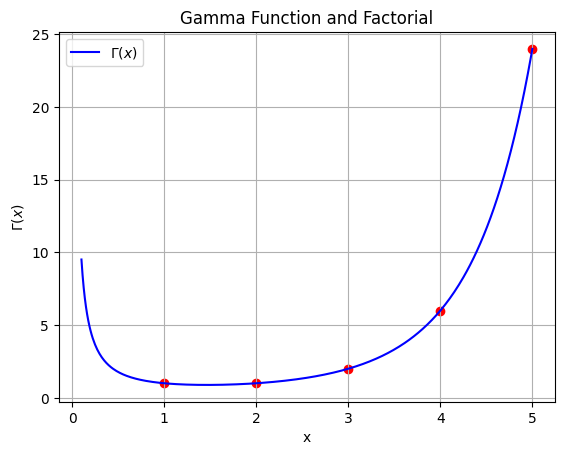

In [3]:
from scipy.special import gamma

# Define the range of x values
x = np.linspace(0.1, 5, 400)

# Calculate the Gamma function values for the x values
y = gamma(x)

# Define integer points
x_integers = np.arange(1, 6)
y_integers = gamma(x_integers)

# Create the plot for the Gamma function
plt.plot(x, y, label=r'$\Gamma(x)$', color='b')

# Add bullets at the integer points
plt.scatter(x_integers, y_integers, color='r', marker='o')

# Add title and labels
plt.title('Gamma Function and Factorial')
plt.xlabel('x')
plt.ylabel(r'$\Gamma(x)$')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


## Generalization of the Binomial Formula

$$
(a + b)^n = \sum_{k=0}^{n} \binom{n}{k} a^{n-k} b^k
$$



$$
(x + y)^\alpha = \sum_{k=0}^{\infty} \binom{\alpha}{k} x^{\alpha - k} y^k
$$

$$
\binom{\alpha}{k} = \frac{\Gamma(\alpha + 1)}{\Gamma(k + 1) \Gamma(\alpha - k + 1)}
$$

In [4]:
# Fractional Derivative - First attempt

#### By Taylor expansion

$$
D^a = \sum_{n=0}^{\infty}\binom{\alpha}{n}D^n = \sum_{n=0}^{\infty}\frac{\Gamma(a+1)}{n!\Gamma(n-a+1)}D^n
$$

Example. Expomemtial

We know $D^n  e^{\lambda x} = \lambda^n e^{\lambda x}$, so we expect
$D^a  e^{\lambda x} = \lambda^a e^{\lambda x}$

Indeed:

\begin{eqnarray}
D^a e^{\lambda x} &=& \sum_{n=0}^{\infty}\frac{\Gamma(a+1)}{n!\Gamma(n-a+1)}D^n e^{\lambda x}\\
&=& e^{\lambda x}\sum_{n=0}^{\infty}\frac{\Gamma(a+1)}{n!\Gamma(n-a+1)} \lambda^n \\
&=& \lambda^a e^{\lambda x}
\end{eqnarray}

From which we can derive the fractional derivatives of trig functions
$$
D^a e^{i\lambda x} = (i\lambda)^a e^{i\lambda x} = (e^{i\pi/2}\lambda)^a e^{i\lambda x} = \lambda^a e^{i(\frac{a\pi}{2}+\lambda x)}
$$

from which

$$
D^a  \cos (\lambda x) = \lambda^a \cos(\frac{a\pi}{2}+\lambda x)
$$

$$
D^a  \sin (\lambda x) = \lambda^a \sin(\frac{a\pi}{2}+\lambda x)
$$


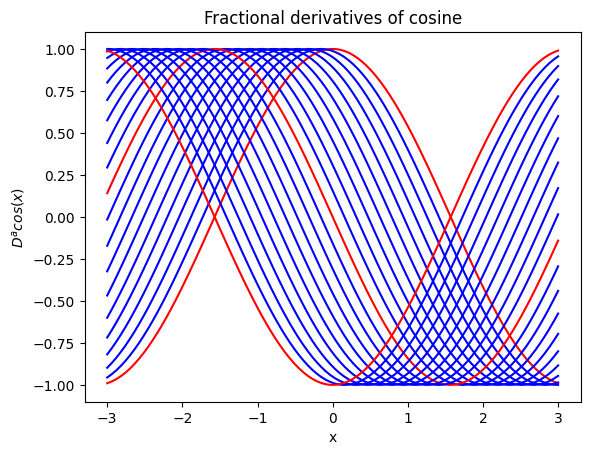

In [5]:
lam = 1

for a in np.arange(0,2.1,0.1):
    x = np.linspace(-3, 3, 100)
    f = lam**a * np.cos(a*np.pi/2 + lam*x)
    color = 'r' if a in [0,1,2] else 'b'
    plt.plot(x,f, color=color)
plt.title('Fractional derivatives of cosine')
plt.xlabel('x')
plt.ylabel(r'$D^a cos(x)$')
plt.show()


In [6]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt


def plot_polynomial(p, points=100):
    x = np.linspace(p.domain[0], p.domain[1], points)
    return plt.plot(x, p(x))

def plot_functions(functions, start, end, points=100):
    x = np.linspace(start, end, points)
    for f in functions:
        plt.plot(x, f(x), label=str(f))
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()



## A polynomial and its Taylor fractional derivatives

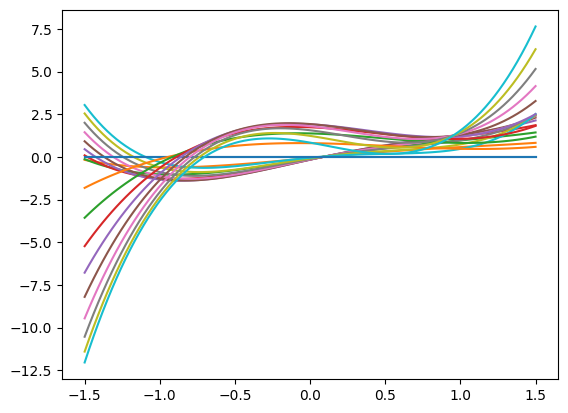

In [8]:
from fractional import taylor_fractional_polynomial_derivative

p = Polynomial.fromroots([-1,0,0.5, 0.8], domain =[-1.5,1.5])

for i in range(0,20):
    deg = 0.1*i
    f = taylor_fractional_polynomial_derivative(p,deg)
    plot_polynomial(f)


Breakdown of method

$$
D^a 1 = \frac{\Gamma(a+1)}{\Gamma(1-a)}
$$

Define a vector space of continuous functions $F$ such that $\forall f\in F, f(0) = 0$. 

Define the linear operator $I: F\rightarrow F$ by

$$
(If)(x) := \int_0^x f(t)dt
$$

Continuous applications of this operator are denoted as $I^nf$.

## Cauchy formula

$$
I^n f(x) = \frac{1}{(n-1)!}\int_0^x (x-t)^{n-1}f(t)dt
$$

#### Proof

Let $F(x) := If(x)$ be the anti-derivative of $f$.

\begin{eqnarray}
\int_0^x (x-t)^n f(t)dt &=& \int_0^x (x-t)^n dF(t)\\
&=& F(t)(x-t)^n \bigg|_0^x + \int_0^x F(t) d(x-t)^n\\
&=& n\int_0^x F(t) (x-t)^{n-1}\\
&=& n(n-1)! I^n F(x)\\
&=& n! I^{n+1} f(x)
\end{eqnarray}


see also https://en.wikipedia.org/wiki/Cauchy_formula_for_repeated_integration

### Fractional Integral

Replace the factorial with the Gamma function in the Cauchy formula

$$
I^a f(x) = \frac{1}{\Gamma(a)}\int_0^x (x-t)^{a-1} f(t)dt  
$$

### Fractional Derivative

In the space of functions we are considering, integration and differentiation are inverse operations. So, we can consider integrals as negarive derivatives:

$$
I^n = D^{-n}
$$

We want to preserve the rule $(D^a I^a)f = f$, so that $I^{-a} = D^a$.

Observe then that $D^a = D^{\lceil a \rceil + a - \lceil a \rceil} = D^{\lceil a \rceil}I^{\lceil a \rceil - a}$

Therefore

$$
D^a f(x) := \frac{1}{\Gamma(\lceil a \rceil - a)} D^{\lceil a \rceil} \int_0^x (x-t)^{\lceil a \rceil - a-1} f(t)dt
$$

For $0<a<1$

$$
D^a f(x) = \frac{1}{\Gamma(1-a)}D\int_0^x (x-t)^{-a}f(t)dt
$$


See also https://en.wikipedia.org/wiki/Fractional_calculus

#### Fractional Derivative of Exponential

Compute

$$
D^a e^{\lambda x} = \frac{1}{\Gamma(1-a)}D\int_{-\infty}^x (x-t)^{-a}e^{\lambda t}dt
$$

First, we evaluate the integral, using the change of variable $u = \lambda(x-t) \rightarrow t = x - u/\lambda$

$$
\begin{eqnarray}
 \int_{-\infty}^x (x-t)^{-a}e^{\lambda t}dt &=&  \int_{\infty}^0 \frac{u^{-a}}{\lambda^{-a}}e^{\lambda x}e^{-u}(-du/\lambda) \\
 &=&  \lambda^{a-1}e^{\lambda x}\int_0^{\infty} u^{-a}e^{-u}du\\
 &=& \lambda^{a-1}e^{\lambda x}\Gamma(1-a)
\end{eqnarray}
$$

Therefore

$$
 \frac{1}{\Gamma(1-a)}D\int_{-\infty}^x (x-t)^{-a}e^{\lambda t}dt = \lambda^a e^{\lambda x}
$$

#### Fractional Derivative of Polynomials

Calculate the fractional derivative $D^a x^n$. 
We need first to compute the integral 

$$
\int_0^x (x-t)^{-a} t^n dt
$$

#### Repeated Integration by Parts

TODO

#### ChatGPT: Change of variables

To evaluate the integral
$$
\int_0^x (x-t)^{-a} t^n \, dt,
$$
we can use a substitution method. Let's consider the substitution $ u = \frac{t}{x} $, so $t = ux $. 
Then, $ dt = x \, du $.

Rewriting the integral in terms of \( u \):
$$
\int_0^x (x-t)^{-a} t^n \, dt = \int_0^x (x-ux)^{-a} (ux)^n x \, du.
$$

Simplifying the integrand:
$$
= x^{n+1} \int_0^1 (x(1-u))^{-a} u^n \, du.
$$

Since $ (x(1-u))^{-a} = x^{-a} (1-u)^{-a} $, the integral becomes:
$$
= x^{n+1} x^{-a} \int_0^1 (1-u)^{-a} u^n \, du.
$$

Simplifying the constants:
$$
= x^{n+1-a} \int_0^1 (1-u)^{-a} u^n \, du.
$$

The integral $ \int_0^1 (1-u)^{-a} u^n \, du $ is a known Beta function, $ B(n+1, 1-a) $. The Beta function is defined as:
$$
B(p, q) = \int_0^1 t^{p-1} (1-t)^{q-1} \, dt.
$$

Comparing, we have $ p = n+1 $ and $ q = 1-a $. Therefore:
$$
\int_0^1 (1-u)^{-a} u^n \, du = B(n+1, 1-a).
$$

Thus, the integral is:
$$
\int_0^x (x-t)^{-a} t^n \, dt = x^{n+1-a} B(n+1, 1-a).
$$

Using the relationship between the Beta function and the Gamma function, $ B(p, q) = \frac{\Gamma(p) \Gamma(q)}{\Gamma(p+q)} $, we can further express the result in terms of Gamma functions:
$$
B(n+1, 1-a) = \frac{\Gamma(n+1) \Gamma(1-a)}{\Gamma(n+1-a)}.
$$

So, the final result is:
$$
\int_0^x (x-t)^{-a} t^n \, dt = x^{n+1-a} \frac{\Gamma(n+1) \Gamma(1-a)}{\Gamma(n+1-a)}.
$$


Consequently

$$
D^a x^n = \frac{n!}{\Gamma(n-a)}x^{n-a}
$$
